In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
pac_and_mem = pd.read_csv('chg_pac_and_mem2.csv')

In [4]:
post_pac_and_mem = pac_and_mem.pivot_table('post_pac', ['pt_num', 'chan', 'trial'], 'freq')
post_pac_and_mem = post_pac_and_mem.reset_index()

In [5]:
# add back the memory score column. this can't be the most efficient way to do it, but it takes <1 s, so whatever
post_pac_and_mem['Memory_Score'] = pac_and_mem.pivot_table(['post_pac', 'Memory_Score'], ['pt_num', 'chan', 'trial'], ['freq'])[('Memory_Score', 'alpha')].reset_index(drop=True)

In [6]:
post_pac_and_mem.loc[post_pac_and_mem['pt_num'] == 113, 'chan'] = post_pac_and_mem[post_pac_and_mem['pt_num'] == 113]['chan'].apply(lambda s: s.replace('H', 'Hip'))

In [7]:
power_df = pd.read_csv('power_log_chg.csv').groupby(['ID', 'Trial', 'Channel']).mean().reset_index()

In [8]:
power_and_pac = post_pac_and_mem.merge(power_df, left_on=['pt_num', 'chan', 'trial'], right_on=['ID', 'Channel', 'Trial'], how='inner')

In [9]:
post_pac_and_mem['pt_num'].value_counts()

105    12
110    12
112    12
113    12
115    12
Name: pt_num, dtype: int64

In [10]:
power_df['ID'].value_counts()

100    12
103    12
105    12
106    12
109    12
110    12
112    12
113    12
115    12
111     8
Name: ID, dtype: int64

In [11]:
power_and_pac['pt_num'].value_counts()

105    12
110    12
112    12
113    12
115    12
Name: pt_num, dtype: int64

In [12]:
power_and_pac.columns

Index(['pt_num', 'chan', 'trial', 'alpha', 'beta', 'high_gamma', 'low_gamma',
       'Memory_Score', 'ID', 'Trial', 'Channel', 'Delta_post', 'Theta_post',
       'Alpha_post', 'Beta_post', 'Gamma_post', 'Stim_Num', 'Delta_pre',
       'Theta_pre', 'Alpha_pre', 'Beta_pre', 'Gamma_pre', 'Delta_log_chg',
       'Theta_log_chg', 'Alpha_log_chg', 'Beta_log_chg', 'Gamma_log_chg'],
      dtype='object')

In [13]:
rahip = power_and_pac[power_and_pac['Channel'] == 'RHip1 - RHip2']

In [51]:
lahip = power_and_pac[power_and_pac['Channel'] == 'LHip1 - LHip2']

In [15]:
power_and_pac.to_excel('power_and_pac2.xlsx')

In [16]:
power_and_pac.columns

Index(['pt_num', 'chan', 'trial', 'alpha', 'beta', 'high_gamma', 'low_gamma',
       'Memory_Score', 'ID', 'Trial', 'Channel', 'Delta_post', 'Theta_post',
       'Alpha_post', 'Beta_post', 'Gamma_post', 'Stim_Num', 'Delta_pre',
       'Theta_pre', 'Alpha_pre', 'Beta_pre', 'Gamma_pre', 'Delta_log_chg',
       'Theta_log_chg', 'Alpha_log_chg', 'Beta_log_chg', 'Gamma_log_chg'],
      dtype='object')

In [52]:
rearr = power_and_pac.pivot_table(['alpha', 'Gamma_pre', 'Memory_Score'], ['pt_num', 'trial'], ['chan'])

In [53]:
rearr.head()

Gamma_pre                                            \
chan         LHip1 - LHip2 LHip3 - LHip4 RHip1 - RHip2 RHip3 - RHip4   
pt_num trial                                                           
105    1               NaN           NaN  1.136271e-10  1.319323e-10   
       2               NaN           NaN  1.366624e-10  1.962482e-10   
       3               NaN           NaN  1.343481e-10  1.439985e-10   
110    1      2.001336e-10  9.317307e-10  1.756134e-10  1.980388e-10   
       2      6.372144e-11  1.728356e-10  1.426859e-10  1.548103e-10   

                                          Memory_Score                \
chan           RST1 - RST2   RST3 - RST4 LHip1 - LHip2 LHip3 - LHip4   
pt_num trial                                                           
105    1      1.013361e-10  2.198923e-10           NaN           NaN   
       2      1.269122e-10  3.142318e-10           NaN           NaN   
       3      1.235053e-10  2.624585e-10           NaN           NaN   
110    1               NaN           NaN           5.0           5.0   
       2               NaN           NaN           5.0           5.0   

                                                                  \
chan         RHip1 - RHip2 RHip3 - RHip4 RST1 - RST2 RST3 - RST4   
pt_num trial                                                       
105    1               5.0           5.0         5.0         5.0   
       2               7.0           7.0         7.0         7.0   
       3               7.0           7.0         7.0         7.0   
110    1               5.0           5.0         NaN         NaN   
       2               5.0           5.0         NaN         NaN   

                     alpha                                            \
chan         LHip1 - LHip2 LHip3 - LHip4 RHip1 - RHip2 RHip3 - RHip4   
pt_num trial                                                           
105    1               NaN           NaN      0.004103      0.004214   
       2               NaN           NaN      0.007048      0.006962   
       3               NaN           NaN      0.006077      0.011367   
110    1          0.013082      0.008462      0.042551      0.007394   
       2          0.003921      0.008549      0.037043      0.007221   

                                      
chan         RST1 - RST2 RST3 - RST4  
pt_num trial                          
105    1        0.008403    0.004000  
       2        0.001389    0.002405  
       3        0.008508    0.006754  
110    1             NaN         NaN  
       2             NaN         NaN

In [54]:
gamma_pow = rearr[('Gamma_pre', 'RHip1 - RHip2')]
alpha_pac = rearr[('alpha', 'LHip1 - LHip2')]
mem = rearr[('Memory_Score', 'LHip3 - LHip4')]

In [55]:
final_df = pd.DataFrame([gamma_pow, alpha_pac, mem]).T

In [56]:
final_df.head()

Gamma_pre         alpha  Memory_Score
             RHip1 - RHip2 LHip1 - LHip2 LHip3 - LHip4
pt_num trial                                          
105    1      1.136271e-10           NaN           NaN
       2      1.366624e-10           NaN           NaN
       3      1.343481e-10           NaN           NaN
110    1      1.756134e-10      0.013082           5.0
       2      1.426859e-10      0.003921           5.0

In [57]:
final_df.columns = final_df.columns.droplevel(1)

In [58]:
final_df.head()

Gamma_pre     alpha  Memory_Score
pt_num trial                                      
105    1      1.136271e-10       NaN           NaN
       2      1.366624e-10       NaN           NaN
       3      1.343481e-10       NaN           NaN
110    1      1.756134e-10  0.013082           5.0
       2      1.426859e-10  0.003921           5.0

In [59]:
# fgoodbye pt 105 who doesn't have L hip
final_df = final_df.dropna().reset_index()

In [60]:
model = smf.ols('Memory_Score ~ np.log10(Gamma_pre) + alpha', final_df)
results = model.fit()
results.summary()

c:\Users\seand\eeg_proj\venv\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Memory_Score   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     10.99
Date:                Mon, 10 Oct 2022   Prob (F-statistic):            0.00384
Time:                        21:53:21   Log-Likelihood:                -17.405
No. Observations:                  12   AIC:                             40.81
Df Residuals:                       9   BIC:                             42.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              45.1321      8.488      5.317      0.000      25.932      64.332
np.log10(Gamma_pre)     3.9445      0.908      4.343      0.002       1.890       5.999
alpha                -140.0201    143.147     -0.978      0.354    -463.842     183.802
==============================================================================
Omnibus:                        2.956   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                1.451
Skew:                           0.852   Prob(JB):                        0.484
Kurtosis:                       2.966   Cond. No.                     3.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
model = smf.ols('Memory_Score ~ alpha', final_df)
results = model.fit()
results.summary()

c:\Users\seand\eeg_proj\venv\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Memory_Score   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.121
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.315
Time:                        21:53:21   Log-Likelihood:                -24.186
No. Observations:                  12   AIC:                             52.37
Df Residuals:                      10   BIC:                             53.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4785      1.510      5.615      0.000       5.114      11.843
alpha       -249.0542    235.246     -1.059      0.315    -773.214     275.106
==============================================================================
Omnibus:                        2.971   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                1.037
Skew:                          -0.051   Prob(JB):                        0.596
Kurtosis:                       1.564   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

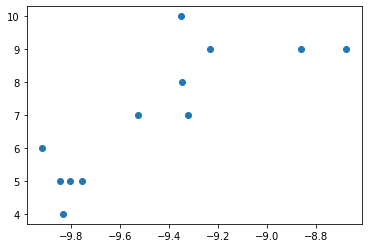

In [62]:
plt.scatter(np.log10(final_df['Gamma_pre']), final_df['Memory_Score'])

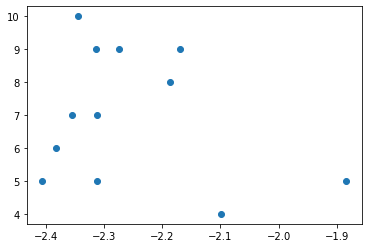

In [63]:
plt.scatter(np.log10(final_df['alpha']), final_df['Memory_Score'])

In [64]:
final_df

pt_num  trial     Gamma_pre     alpha  Memory_Score
0      110      1  1.756134e-10  0.013082           5.0
1      110      2  1.426859e-10  0.003921           5.0
2      110      3  2.983836e-10  0.004415           7.0
3      112      1  4.477111e-10  0.006497           8.0
4      112      2  5.854494e-10  0.006770           9.0
5      112      3  4.448349e-10  0.004526          10.0
6      113      1  4.748359e-10  0.004871           7.0
7      113      2  2.113711e-09  0.005326           9.0
8      113      3  1.373457e-09  0.004850           9.0
9      115      1  1.469669e-10  0.007950           4.0
10     115      2  1.203533e-10  0.004146           6.0
11     115      3  1.573105e-10  0.004883           5.0

In [65]:
model = smf.mixedlm("Memory_Score ~ alpha", final_df, groups=final_df['pt_num'])
model.fit().summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
==========================================================
Model:            MixedLM Dependent Variable: Memory_Score
No. Observations: 12      Method:             REML        
No. Groups:       4       Scale:              1.0671      
Min. group size:  3       Log-Likelihood:     -14.4156    
Max. group size:  3       Converged:          Yes         
Mean group size:  3.0                                     
----------------------------------------------------------
             Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept      8.059    1.218  6.614 0.000    5.671 10.447
alpha       -178.408  128.315 -1.390 0.164 -429.901 73.084
Group Var      3.262    3.419                             
==========================================================

"""